In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [4]:
x_train, x_val = x_train[:-5000], x_train[-5000:]
y_train, y_val = y_train[:-5000], y_train[-5000:]


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1407/1407 [==============================] - 26s 18ms/step - loss: 1.5128 - accuracy: 0.4517 - val_loss: 1.2168 - val_accuracy: 0.5646
Epoch 2/5
1407/1407 [==============================] - 26s 19ms/step - loss: 1.1323 - accuracy: 0.6009 - val_loss: 1.0430 - val_accuracy: 0.6422
Epoch 3/5
1407/1407 [==============================] - 26s 19ms/step - loss: 0.9719 - accuracy: 0.6587 - val_loss: 0.9424 - val_accuracy: 0.6700
Epoch 4/5
1407/1407 [==============================] - 27s 19ms/step - loss: 0.8649 - accuracy: 0.6976 - val_loss: 0.8685 - val_accuracy: 0.7074
Epoch 5/5
1407/1407 [==============================] - 27s 19ms/step - loss: 0.7804 - accuracy: 0.7272 - val_loss: 0.8702 - val_accuracy: 0.7066


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.8878 - accuracy: 0.6955
Test accuracy: 0.6955000162124634
Test loss: 0.8878189325332642


In [13]:
import matplotlib.pyplot as plt
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])

In [16]:
import random
import numpy as np

1/1 [==============================] - 0s 89ms/step
cat
1/1 [==============================] - 0s 22ms/step
frog
1/1 [==============================] - 0s 21ms/step
airplane
1/1 [==============================] - 0s 22ms/step
automobile
1/1 [==============================] - 0s 20ms/step
truck


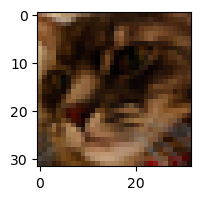

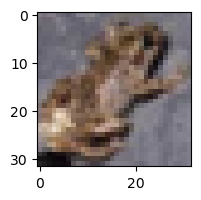

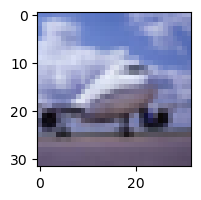

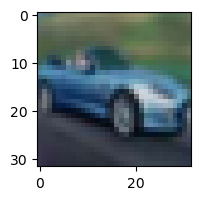

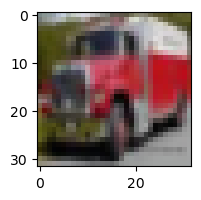

In [17]:
for i in range(5):
    k=random.randint(0,len(x_test))
    plot_sample(x_test,y_test,k)
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    pred=classes[np.argmax(model.predict(x_test[k].reshape(1,32,32,3)))]
    print(pred)